In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

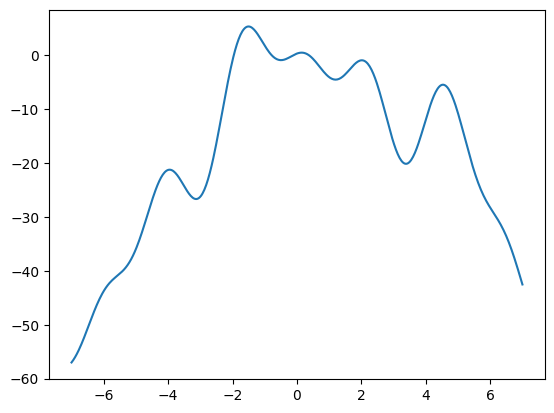

In [2]:
data = pd.read_csv("data.csv")
x = data.X
y = data.FX
plt.plot(x,y)

In [3]:
x.shape
y.shape

(500,)

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(200,activation="leaky_relu"),
    tf.keras.layers.Dense(200,activation="leaky_relu"),
    tf.keras.layers.Dense(100,activation="leaky_relu"),
    tf.keras.layers.Dense(1,activation="leaky_relu"),
    # tf.keras.layers.Softmax()
])

In [5]:
model.compile(
    optimizer = "adam",
    # loss = tf.keras.losses.SparseCategoricalCrossentropy,
    loss = tf.keras.losses.MeanAbsoluteError,
    metrics = ['accuracy','precision']
)

(-59.00407002606446, 7.373284168603076)

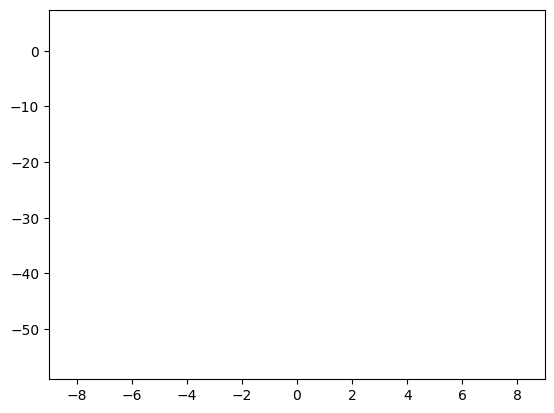

In [6]:
fig, axis = plt.subplots()
animated_plot, = axis.plot([],[])
axis.set_xlim(min(x)-2,max(x)+2)
axis.set_ylim(min(y)-2,max(y)+2)

In [7]:

def updatefunc(frame):
    # plt.cla()
    convhistory = model.fit(x,y,epochs=frame)
    prediction = model.predict(x)
    ls = []
    for i in range(len(y)):
        ls.append((prediction[i]))
    animated_plot.set_data(x,ls)
    animated_plot.set_label(f"Iteration {frame}")
    return animated_plot

In [8]:
animate = FuncAnimation(
    fig = fig,
    func=updatefunc,
    frames=80,
    interval=100
)
plt.show()

In [9]:
animate.save("animconv.mp4")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 17.4118 - precision: 0.0000e+00   
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step
Epoch 1/2
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 16.0709 - precision: 0.0000e+00 
Epoch 2/2
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 10.3290 - precision: 0.0000e+00 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 6.0528 - precision: 0.0000e+00 
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 5.7165 - precision: 0.0000e+00 
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 5.0004 - precision: 0.0000e+00 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step
Epoch 1/4
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 4.7214 - precision: 0.5294     
Epoch 2/4
16/16 

In [9]:
convhistory=None
convhistory = model.fit(x,y,epochs=50)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: 17.3980 - precision: 0.0000e+00
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 16.2097 - precision: 0.0000e+00 
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 10.8521 - precision: 0.0000e+00
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 6.3351 - precision: 0.0000e+00 
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 5.9664 - precision: 0.0000e+00
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 5.2813 - precision: 0.0000e+00
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 5.2198 - precision: 0.2353    
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 4.8186 - precision: 1.0000
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 4.5476 - precision: 1.

Text(0.5, 1.0, 'Loss Curve B')

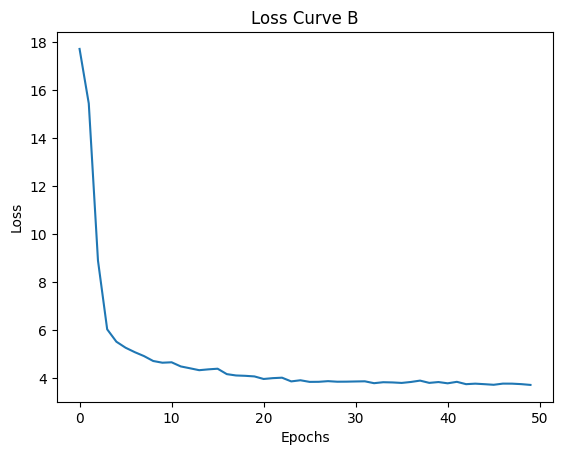

In [10]:
plt.plot(convhistory.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve B')

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 200)            │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 182,405 (712.52 KB)

 Trainable params: 60,801 (237.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 121,604 (475.02 KB)

In [11]:
with open("analysis.txt",'a') as f:
    f.write(f"{convhistory.history['loss']}\n")

In [10]:
def modelit(iters):
    plt.cla()
    model.fit(x,y,epochs=iters)
    prediction = model.predict(x)
    ls = []
    for i in range(len(y)):
        ls.append((prediction[i]))
    plt.plot(x,y)
    plt.plot(x,ls)
    plt.title(f"Iteration: {iters}")
    plt.savefig(f'animconv/conv{iters}.png')

for i in range(0):
    modelit(i)
    

In [ ]:
model.fit(x,y,epochs = 500)

In [ ]:
index = 21
print(y[index])
prediction = model.predict(x)
ls = []
for i in range(len(y)):
    ls.append((prediction[i]))
print(ls[index])

In [ ]:
plt.plot(x,y)
plt.plot(x,ls)